In this project, you will demonstrate the essential skills involved in hypothesis testing. To do so, we will use a real dataset that stems from a replication attempt of published research (Wallisch & Whritner, 2017). 

You can pretend you are working for a major movie studio that needs to answer these questions in order to optimize their operations. You can use figures as needed to buttress/illustrate your argument.

Note that you will need to do a lot of tests (of your choice, as appropriate) to answer these questions, so to cut down on false positives, set the per-test significance level 𝛼 to 0.005 (as per Benjamin et al., 2018).

### Dataset description
This dataset features ratings data of 400 movies from 1097 research participants. 1st row: Headers (Movie titles/questions) – note that the indexing in this list is from 1.

- Row 2-1098: Responses from individual participants
- Columns 1-400: These columns contain the ratings for the 400 movies (0 to 4, and missing)
- Columns 401-421: These columns contain self-assessments on sensation seeking behaviors (1-5)
- Columns 422-464: These columns contain responses to personality questions (1-5)
- Columns 465-474: These columns contain self-reported movie experience ratings (1-5)
- Column 475: Gender identity (1 = female, 2 = male, 3 = self-described)
- Column 476: Only child (1 = yes, 0 = no, -1 = no response)
- Column 477: Movies are best enjoyed alone (1 = yes, 0 = no, -1 = no response)

Note that we did most of the data munging for you already (e.g. Python interprets commas in a csv file as separators, so we removed all commas from movie titles), but you still need to handle missing data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("movieReplicationSet.csv")

In [3]:
df

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


In [4]:
df.describe()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
count,76.000000,71.000000,453.000000,289.000000,463.000000,128.000000,182.000000,254.000000,137.000000,588.000000,...,1077.000000,1073.000000,1078.000000,1075.000000,1074.000000,1077.000000,1079.000000,1073.000000,1097.000000,1097.000000
mean,2.151316,2.021127,3.153422,2.707612,2.778618,2.597656,2.365385,2.899606,2.496350,2.911565,...,2.763231,3.100652,2.234694,4.446512,4.259777,3.319406,2.159407,1.253495,0.137648,0.533273
std,1.166247,1.141542,0.916403,1.153261,0.906993,1.019608,1.028468,1.062643,1.020914,0.969203,...,1.499884,1.462571,1.242105,1.254294,1.248493,1.246603,1.275058,0.447890,0.407743,0.542900
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000
25%,1.000000,1.000000,3.000000,2.000000,2.500000,2.000000,1.500000,2.500000,2.000000,2.500000,...,1.000000,2.000000,1.000000,4.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,2.500000,2.000000,3.500000,3.000000,3.000000,3.000000,2.500000,3.000000,2.500000,3.000000,...,3.000000,3.000000,2.000000,5.000000,4.000000,3.000000,2.000000,1.000000,0.000000,1.000000
75%,3.000000,3.000000,4.000000,3.500000,3.500000,3.500000,3.000000,3.875000,3.000000,3.500000,...,4.000000,4.000000,3.000000,5.000000,5.000000,4.000000,3.000000,1.000000,0.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,3.000000,1.000000,1.000000


Questions to answer:

8. What proportion of movies exhibit such a “social watching” effect?
9. Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’?
10. There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these are of inconsistent quality, as experienced by viewers? [Hint: You can use the keywords in quotation marks featured in this question to identify the movies that are part of each franchise]

## Q8

In [5]:
df = df.rename(columns={'Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)':'social_watching'})

df.social_watching.value_counts()

social_watching
 1    610
 0    462
-1     25
Name: count, dtype: int64

In [6]:
exclude_columns = 77
counter = 0

for column in df.columns[:-exclude_columns]:
    tmp_asocial = df[df['social_watching'] == 0][column]
    tmp_asocial = tmp_asocial[~np.isnan(tmp_asocial)]

    tmp_social = df[df['social_watching'] == 1][column]
    tmp_social = tmp_social[~np.isnan(tmp_social)]

    #print('Difference in µ:', abs(tmp_social.mean() - tmp_asocial.mean()))
    u,p = stats.mannwhitneyu(tmp_asocial, tmp_social, alternative="greater")
    if p <= .05:
        counter += 1

print("Percent of movies such a social watching effect:",counter / (df.shape[1] - exclude_columns) * 100,"%")

Percent of movies such a social watching effect: 7.75 %


In [20]:
p

0.04322822151539945

In [7]:
n_iterations = 1000  # Number of random iterations
count_significant = 0

for _ in range(n_iterations):
    # Create random data for two fictitious movies
    random_data1 = np.random.rand(len(tmp_asocial))  # Replace with actual data generation
    random_data2 = np.random.rand(len(tmp_social))  # Replace with actual data generation
    
    _, random_p_value = stats.mannwhitneyu(random_data1, random_data2)
    
    if random_p_value < .05:
        count_significant += 1

false_positive_rate = count_significant / n_iterations
print(f"False Positive Rate: {false_positive_rate:.4f}")

False Positive Rate: 0.0550


## Q9
Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’?

In [8]:
homealone = df['Home Alone (1990)']
nemo = df['Finding Nemo (2003)']

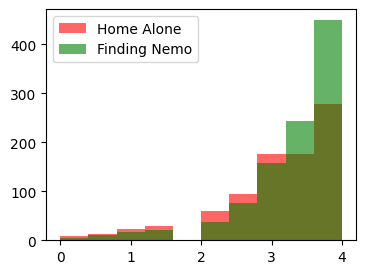

In [9]:
plt.figure(figsize=(4,3))
plt.hist(homealone, color='red', alpha =0.6, label='Home Alone')
plt.hist(nemo,alpha=0.6, color='green', label='Finding Nemo')
plt.legend()
plt.show()

The distributions for both the movies appears to be exponential.

### 1. Kolmogorov-Smirnov (KS) test

In [38]:
t_stat, p_value = stats.ks_2samp(homealone, nemo)
print(p_value.round(11))
if p_value < 0.05:
    print("The ratings distribution of 'Home Alone (1990)' is statistically different from 'Finding Nemo (2003)'")
else:
    print("There is no statistically significant difference in the ratings distribution between the two movies.")

3.3e-10
The ratings distribution of 'Home Alone (1990)' is statistically different from 'Finding Nemo (2003)'


In [30]:
n_iterations = 1000  # Number of random iterations
count_significant = 0

for _ in range(n_iterations):
    # Create random data for two fictitious movies
    random_data1 = np.random.rand(len(homealone))  # Replace with actual data generation
    random_data2 = np.random.rand(len(nemo))  # Replace with actual data generation
    
    _, random_p_value = stats.ks_2samp(random_data1, random_data2)
    
    if random_p_value < .05:
        count_significant += 1

false_positive_rate = count_significant / n_iterations
print(f"False Positive Rate: {false_positive_rate:.4f}")

False Positive Rate: 0.0370


### 2. Wilcoxon signed-rank test

In [31]:
wilcoxon_stat, p_value_ = stats.wilcoxon(homealone, nemo)

if p_value_ < 0.05:
    print("The ratings distribution of 'Home Alone (1990)' is statistically different from 'Finding Nemo (2003)'")
else:
    print("There is no statistically significant difference in the ratings distribution between the two movies.")
    
p_value_
# wilcoxon_stat

There is no statistically significant difference in the ratings distribution between the two movies.


nan

In [17]:
n_iterations = 1000  # Number of random iterations
count_significant = 0

for _ in range(n_iterations):
    # Create random data for two fictitious movies
    random_data1 = np.random.rand(len(homealone))  # Replace with actual data generation
    random_data2 = np.random.rand(len(nemo))  # Replace with actual data generation
    
    _, random_p_value = stats.wilcoxon(random_data1, random_data2)
    
    if random_p_value < 0.05:
        count_significant += 1

false_positive_rate = count_significant / n_iterations
print(f"False Positive Rate: {false_positive_rate:.4f}")

False Positive Rate: 0.0490


## Q10
There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these are of inconsistent quality, as experienced by viewers? [Hint: You can use the keywords in quotation marks featured in this question to identify the movies that are part of each franchise]

In [49]:
franchises = ['Star Wars', 'Harry Potter', 'The Matrix','Indiana Jones', 
              'Jurassic Park', 'Pirates of the Caribbean','Toy Story', 'Batman']

### Mann Whitney

In [87]:
for franchise in franchises:
    francdf = df[df.filter(regex=franchise).columns]
#     print(franchise)

    #selecting the first 400 columns
    data = francdf#.iloc[:, :400]

    #calculating median-popularity
    median = data.count().median()
    
    #Extracting popular movies
    popular_movies = data.count()[data.count() >= median].index

    #Extracting non-popular_movies
    non_popular_movies = data.count()[data.count() < median].index
    
    #Creating arrays for Statistical Testing
    #Popular Movies Array
    popular_movies_array = data[popular_movies[0]]
    for popular_movie in popular_movies[1:] :
        popular_movies_array = pd.concat([popular_movies_array, data[popular_movie]])

    #Non-Popular Movies Array
    non_popular_movies_array = data[non_popular_movies[0]]
    for non_popular_movie in non_popular_movies[1:]:
        non_popular_movies_array = pd.concat([non_popular_movies_array, data[non_popular_movie]])

#     print("Length of arrays before element-wise removal:", len(popular_movies_array), ",", len(non_popular_movies_array))

    #Element-wise removal
    popular_movies_array = popular_movies_array.dropna()
    non_popular_movies_array = non_popular_movies_array.dropna()

#     print("Length of arrays:", len(popular_movies_array), ",", len(non_popular_movies_array))
    u,p = stats.mannwhitneyu(popular_movies_array, non_popular_movies_array, alternative="greater")
#     print(franchise,"- P value:", round(p,4))
    
    if p>0.05:
        print("Pvalue of",franchise,"is", round(p,4), "> constant\n")
    else:
        print("Pvalue of",franchise,"is",round(p,4),'inconsistent\n')
    


Pvalue of Star Wars is 0.9467 > constant

Pvalue of Harry Potter is 0.3613 > constant

Pvalue of The Matrix is 0.0038 inconsistent

Pvalue of Indiana Jones is 0.461 > constant

Pvalue of Jurassic Park is 0.0 inconsistent

Pvalue of Pirates of the Caribbean is 0.171 > constant

Pvalue of Toy Story is 0.9716 > constant

Pvalue of Batman is 0.0 inconsistent



In [43]:
len(francdf.columns)

3

## Friedman

In [ ]:

# Assuming you have a DataFrame 'data' with columns 'Sample' and 'Values'

# Perform the Friedman test
statistic, p_value = stats.friedmanchisquare(*[group['Values'] for name, group in data.groupby('Sample')])

# Set a significance level (alpha)
alpha = 0.05  # You can adjust this based on your desired level of significance

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("There are significant differences among the dependent samples.")
else:
    print("There are no significant differences among the dependent samples.")


In [98]:
for franchise in franchises:
    francdf = df[df.filter(regex=franchise).columns]
#     print(franchise)

    #selecting the first 400 columns
    data = francdf.columns

    p_values = []

    # Iterate through the columns and perform the Friedman test
    for column in data:
        u,p = stats.wilcoxon(*[francdf[col] for col in data])
        p_values.append(p)

    # Set a significance level (alpha)
    alpha = 0.05  # You can adjust this based on your desired level of significance
    print(p)

    # Check the p-values and determine if there are significant differences
#     significant_differences = [p < .05 for p in p_values]

#     for i, column in enumerate(columns_to_compare):
#         if significant_differences[i]:
#             print(f"Significant differences found in {column}.")
#         else:
#             print(f"No significant differences found in {column}.")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [82]:
for franc in francdf.columns:
    print(francdf[franc])

0       NaN
1       NaN
2       NaN
3       4.0
4       NaN
       ... 
1092    4.0
1093    4.0
1094    3.0
1095    NaN
1096    1.0
Name: Star Wars: Episode IV - A New Hope (1977), Length: 1097, dtype: float64
0       NaN
1       NaN
2       NaN
3       0.0
4       NaN
       ... 
1092    3.0
1093    3.0
1094    1.5
1095    4.0
1096    1.0
Name: Star Wars: Episode II - Attack of the Clones (2002), Length: 1097, dtype: float64
0       NaN
1       NaN
2       NaN
3       4.0
4       NaN
       ... 
1092    4.0
1093    3.5
1094    3.0
1095    4.0
1096    NaN
Name: Star Wars: Episode V - The Empire Strikes Back (1980), Length: 1097, dtype: float64
0       NaN
1       NaN
2       NaN
3       0.0
4       NaN
       ... 
1092    NaN
1093    4.0
1094    2.5
1095    4.0
1096    1.0
Name: Star Wars: Episode 1 - The Phantom Menace (1999), Length: 1097, dtype: float64
0       NaN
1       NaN
2       NaN
3       2.5
4       NaN
       ... 
1092    4.0
1093    4.0
1094    4.0
1095    NaN
1096    NaN

## Wilcoxon

In [99]:
for franchise in franchises:
    francdf = df[df.filter(regex=franchise).columns]
#     print(franchise)

    #selecting the first 400 columns
    data = francdf.iloc[:, :400]

    #calculating median-popularity
    median = data.count().median()
    
    #Extracting popular movies
    popular_movies = data.count()[data.count() >= median].index

    #Extracting non-popular_movies
    non_popular_movies = data.count()[data.count() < median].index
    
    #Creating arrays for Statistical Testing
    #Popular Movies Array
    popular_movies_array = data[popular_movies[0]]
    for popular_movie in popular_movies[1:] :
        popular_movies_array = pd.concat([popular_movies_array, data[popular_movie]])

    #Non-Popular Movies Array
    non_popular_movies_array = data[non_popular_movies[0]]
    for non_popular_movie in non_popular_movies[1:]:
        non_popular_movies_array = pd.concat([non_popular_movies_array, data[non_popular_movie]])

#     print("Length of arrays before element-wise removal:", len(popular_movies_array), ",", len(non_popular_movies_array))

    #Element-wise removal
    popular_movies_array = popular_movies_array.dropna()
    non_popular_movies_array = non_popular_movies_array.dropna()

#     print("Length of arrays:", len(popular_movies_array), ",", len(non_popular_movies_array))
    u,p = stats.wilcoxon(popular_movies_array, non_popular_movies_array, paired = False)
#     print(franchise,"- P value:", round(p,4))
    
    if p>0.05:
        print("Pvalue of",franchise,"is", round(p,4), "> constant\n")
    else:
        print("Pvalue of",franchise,"is",round(p,4),'inconsistent\n')
    


TypeError: wilcoxon() got an unexpected keyword argument 'paired'

### Approach 2 with std

In [67]:

inconsistent_quality_count = 0

for franchise in franchises:
    inconsistent_quality_count=0
    # Filter movies associated with the franchise using keywords
    franchise_movies = df[df.filter(regex=franchise).columns]
    
    # Calculate the standard deviation of ratings for this franchise
    for franc in franchise_movies:
        std_deviation = franchise_movies[franc].std()

        # Define a threshold for inconsistency (you can adjust this threshold)
        threshold = 1.0

        # Check if the standard deviation is above the threshold
        if std_deviation > threshold:
            inconsistent_quality_count += 1

    print(f"{franchise} movies: {inconsistent_quality_count}")


Star Wars movies: 3
Harry Potter movies: 0
The Matrix movies: 2
Indiana Jones movies: 1
Jurassic Park movies: 0
Pirates of the Caribbean movies: 0
Toy Story movies: 0
Batman movies: 1


In [64]:
franchise_movies

,Batman & Robin (1997),Batman (1989),Batman: The Dark Knight (2008)
0,NaN,NaN,2.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,3.0
4,0.5,1.0,2.5
...,...,...,...
1092,NaN,NaN,NaN
1093,3.0,3.5,4.0
1094,NaN,3.0,3.5
1095,NaN,NaN,NaN
